## EDA and Preprocessing - AUTOMOBILE CARS
Basic EDA - Info, shape

Handling Missing Values

Handling Outliers

Handling Skewness

Categorical Data Encoding

Data Normalization or Scaling

Feature Engineering

# Car Sales Price Prediction

# 1. Importing the libraries

A Python library is a collection of related modules. It contains bundles of code that can be used repeatedly in different programs. It makes Python Programming simpler and convenient for the programmer. As we don't need to write the same code again and again for different programs.

In this notebook, we will be using the following libraries.

In [1]:
### Data Wrangling 

import numpy as np
import pandas as pd

### Data Visualization

import matplotlib.pyplot as plt
import seaborn as sns

### Data Preprocessing

import statsmodels.api as sm
from scipy import stats

### Remove unnecessary warnings

import warnings
warnings.filterwarnings('ignore')

# 2. Importing the data

In this section, I will fetch the dataset that is available in the Kaggle's project description in the Data section.

The training set should be used to build your machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each Car model. Your model will be based on “features” like Manufacturer, Model, Vehicle Type, Horsepower etc. You can also use feature engineering to create new features.

The test set should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth. It is your job to predict these outcomes. For each car, our task is to predict the sales price of the car.

In [2]:
### Fetching the dataset

dataset =pd.read_csv("Car_sales.csv")

In [3]:
### Looking at the sample data in the dataset

dataset.head(10)

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639
5,Audi,A6,18.780,23.555,Passenger,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,8/9/2011,84.565105
6,Audi,A8,1.380,39.000,Passenger,62.00,4.2,310.0,113.0,74.0,198.2,3.902,23.7,21.0,2/27/2012,134.656858
7,BMW,323i,19.747,NaN,Passenger,26.99,2.5,170.0,107.3,68.4,176.0,3.179,16.6,26.0,6/28/2011,71.191207
8,BMW,328i,9.231,28.675,Passenger,33.40,2.8,193.0,107.3,68.5,176.0,3.197,16.6,24.0,1/29/2012,81.877069
9,BMW,528i,17.527,36.125,Passenger,38.90,2.8,193.0,111.4,70.9,188.0,3.472,18.5,25.0,4/4/2011,83.998724


In [4]:
### Shape of the dataset

dataset.shape

(157, 16)

The dataset consists of 16 columns and 157 rows.

# 3. Exploratory Data Analysis

Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.

Here, we will perform EDA on the categorical columns of the dataset - Manufacturer, Vehicle_type and the numerical columns of the dataset - Sales_in_thousands, __year_resale_value, Price_in_thousands, Engine_size, Horsepower, Wheelbase, Width, Length, Curb_weight, Fuel_capacity, Fuel_efficiency, Power_perf_factor.

# 3.1 Datatypes, Missing Data, and Summary Statistics

In [5]:
### Looking at the datatypes of the dataset

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         157 non-null    object 
 1   Model                157 non-null    object 
 2   Sales_in_thousands   157 non-null    float64
 3   __year_resale_value  121 non-null    float64
 4   Vehicle_type         157 non-null    object 
 5   Price_in_thousands   155 non-null    float64
 6   Engine_size          156 non-null    float64
 7   Horsepower           156 non-null    float64
 8   Wheelbase            156 non-null    float64
 9   Width                156 non-null    float64
 10  Length               156 non-null    float64
 11  Curb_weight          155 non-null    float64
 12  Fuel_capacity        156 non-null    float64
 13  Fuel_efficiency      154 non-null    float64
 14  Latest_Launch        157 non-null    object 
 15  Power_perf_factor    155 non-null    flo

Here, the columns - Manufacturer, Model, Vehicle_type are categorical. Hence, we modify the datatype of these columns to category.

In [6]:
dataset["Manufacturer"]

0      Acura
1      Acura
2      Acura
3      Acura
4       Audi
       ...  
152    Volvo
153    Volvo
154    Volvo
155    Volvo
156    Volvo
Name: Manufacturer, Length: 157, dtype: object

In [7]:
### Modifying the datatypes of the columns to category

dataset.Manufacturer = dataset.Manufacturer.astype('category')
dataset.Model = dataset.Model.astype('category')
dataset.Vehicle_type = dataset.Vehicle_type.astype('category')

Looking at the modified datatypes of the columns in the dataset.

In [8]:
### Looking at the modified datatypes of the dataset

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Manufacturer         157 non-null    category
 1   Model                157 non-null    category
 2   Sales_in_thousands   157 non-null    float64 
 3   __year_resale_value  121 non-null    float64 
 4   Vehicle_type         157 non-null    category
 5   Price_in_thousands   155 non-null    float64 
 6   Engine_size          156 non-null    float64 
 7   Horsepower           156 non-null    float64 
 8   Wheelbase            156 non-null    float64 
 9   Width                156 non-null    float64 
 10  Length               156 non-null    float64 
 11  Curb_weight          155 non-null    float64 
 12  Fuel_capacity        156 non-null    float64 
 13  Fuel_efficiency      154 non-null    float64 
 14  Latest_Launch        157 non-null    object  
 15  Power_perf_factor    15

From the above data it is evident that there are missing values in the dataset.

From the above dataset, we can see that there are missing values in the column - __year_resale_value, Price_in_thousands, Engine_size, Horsepower, Wheelbase, Width, Length, Curb_weight, Fuel_capacity, Fuel_efficiency, Power_perf_factor.

In [9]:
### Summary statistics of the numerical columns in the dataset

dataset.describe()

,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
count,157.000000,121.000000,155.000000,156.000000,156.000000,156.000000,156.000000,156.000000,155.000000,156.000000,154.000000,155.000000
mean,52.998076,18.072975,27.390755,3.060897,185.948718,107.487179,71.150000,187.343590,3.378026,17.951923,23.844156,77.043591
std,68.029422,11.453384,14.351653,1.044653,56.700321,7.641303,3.451872,13.431754,0.630502,3.887921,4.282706,25.142664
min,0.110000,5.160000,9.235000,1.000000,55.000000,92.600000,62.600000,149.400000,1.895000,10.300000,15.000000,23.276272
25%,14.114000,11.260000,18.017500,2.300000,149.500000,103.000000,68.400000,177.575000,2.971000,15.800000,21.000000,60.407707
50%,29.450000,14.180000,22.799000,3.000000,177.500000,107.000000,70.550000,187.900000,3.342000,17.200000,24.000000,72.030917
75%,67.956000,19.875000,31.947500,3.575000,215.000000,112.200000,73.425000,196.125000,3.799500,19.575000,26.000000,89.414878
max,540.561000,67.550000,85.500000,8.000000,450.000000,138.700000,79.900000,224.500000,5.572000,32.000000,45.000000,188.144323


# 3.2 Feature Analysis

# 3.2.1 Categorical variable - Manufacturer

In [10]:
### Value counts of the column - Manufacturer

manufacturer_count = dataset['Manufacturer'].value_counts(dropna = False)
manufacturer_count

Manufacturer
Ford          11
Dodge         11
Chevrolet      9
Mercedes-B     9
Toyota         9
Chrysler       7
Mitsubishi     7
Nissan         7
Mercury        6
Oldsmobile     6
Lexus          6
Pontiac        6
Volvo          6
Volkswagen     6
Cadillac       5
Honda          5
Saturn         5
Plymouth       4
Buick          4
Acura          4
Audi           3
BMW            3
Lincoln        3
Porsche        3
Jeep           3
Hyundai        3
Saab           2
Subaru         2
Jaguar         1
Infiniti       1
Name: count, dtype: int64

In [11]:
dataset.duplicated().sum() # check duplicate
# drop duplicate
dataset.drop_duplicates(inplace=True)

In [12]:
### Value counts of the column - Manufacturer

manufacturer_count = dataset['Manufacturer'].value_counts()
manufacturer_count

Manufacturer
Ford          11
Dodge         11
Chevrolet      9
Mercedes-B     9
Toyota         9
Chrysler       7
Mitsubishi     7
Nissan         7
Mercury        6
Oldsmobile     6
Lexus          6
Pontiac        6
Volvo          6
Volkswagen     6
Cadillac       5
Honda          5
Saturn         5
Plymouth       4
Buick          4
Acura          4
Audi           3
BMW            3
Lincoln        3
Porsche        3
Jeep           3
Hyundai        3
Saab           2
Subaru         2
Jaguar         1
Infiniti       1
Name: count, dtype: int64

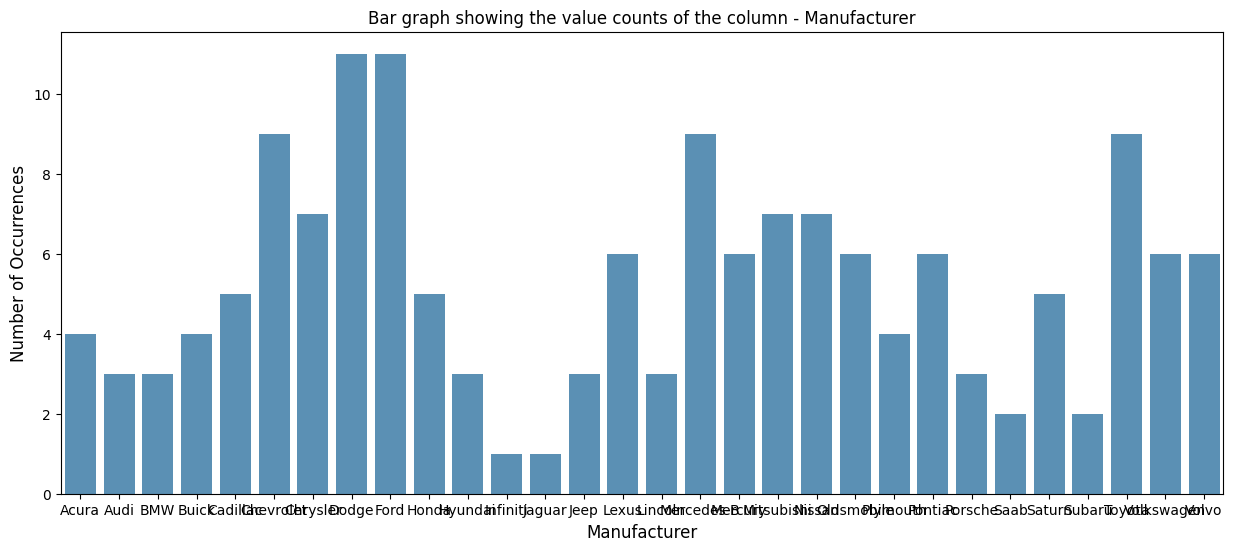

In [13]:
### Bar graph showing the value counts of the column - Manufacturer

plt.figure(figsize = (15, 6))
sns.barplot(x=manufacturer_count.index, y= manufacturer_count.values, alpha = 0.8)
plt.title('Bar graph showing the value counts of the column - Manufacturer')
plt.ylabel('Number of Occurrences', fontsize = 12)
plt.xlabel('Manufacturer', fontsize = 12)
plt.show()

From the above graph, we can see that the number of occurences of the car manufacturers is not uniformly distributed.

In [14]:
### Mean price per each Manufacturer 

mean_price_manufacturer = dataset[['Manufacturer', 'Price_in_thousands']].groupby('Manufacturer', as_index = False).mean()
mean_price_manufacturer

,Manufacturer,Price_in_thousands
0,Acura,30.633333
1,Audi,39.980000
2,BMW,33.096667
3,Buick,26.781250
4,Cadillac,40.254000
5,Chevrolet,20.022778
6,Chrysler,23.430833
7,Dodge,24.213636
8,Ford,21.047273
9,Honda,20.277000


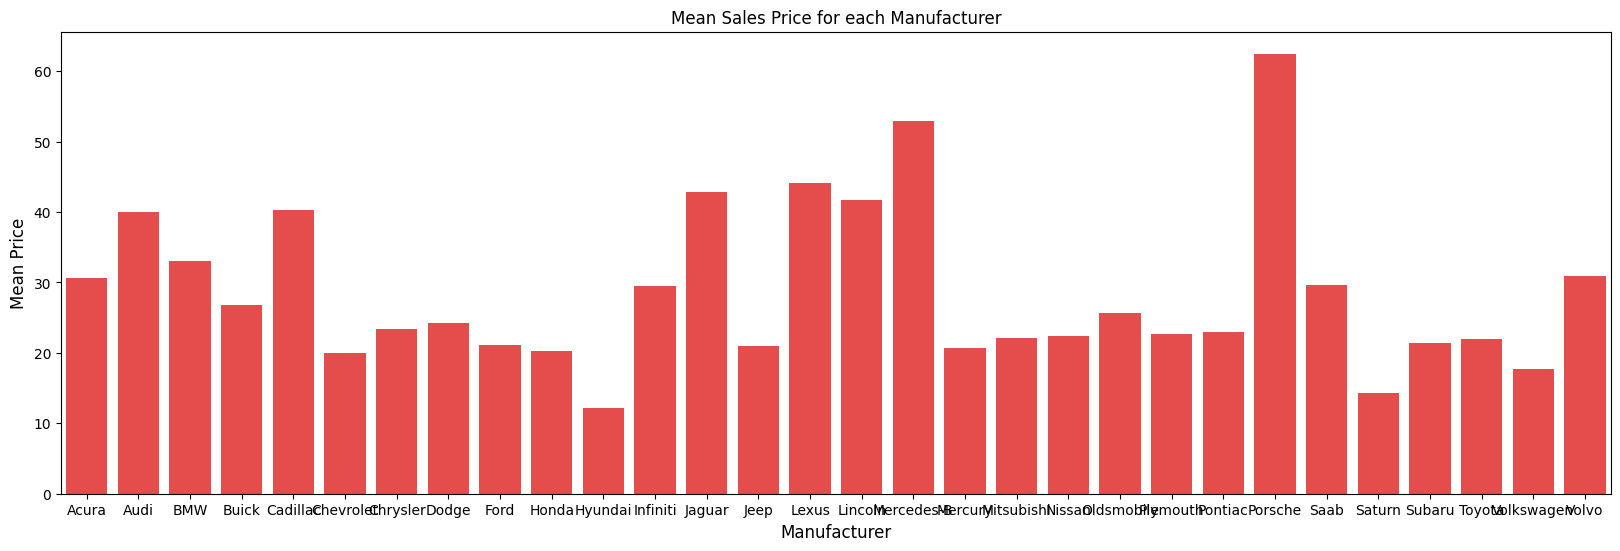

In [15]:
### Mean Price for each Manufacturer

plt.figure(figsize = (20, 6))
sns.barplot(x=mean_price_manufacturer['Manufacturer'], 
            y=mean_price_manufacturer['Price_in_thousands'], 
        alpha = 0.8,color="red" )
plt.title('Mean Sales Price for each Manufacturer')
plt.ylabel('Mean Price', fontsize = 12)
plt.xlabel('Manufacturer', fontsize = 12)
plt.show()

# 3.2.2 Categorical variable - Vehicle_type

In [16]:
### Value counts of the column - Vehicle_type

vehicle_count = dataset['Vehicle_type'].value_counts(dropna = False)
vehicle_count

Vehicle_type
Passenger    116
Car           41
Name: count, dtype: int64

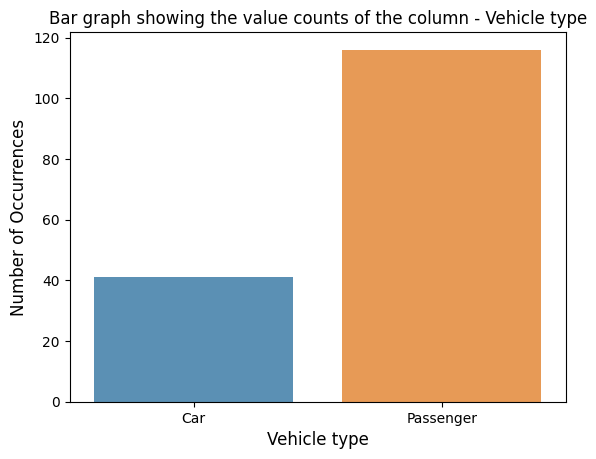

In [17]:
### Bar graph showing the value counts of the column - Vehicle_type

sns.barplot(x=vehicle_count.index, y=vehicle_count.values, alpha = 0.8,hue=vehicle_count.index)
plt.title('Bar graph showing the value counts of the column - Vehicle type')
plt.ylabel('Number of Occurrences', fontsize = 12)
plt.xlabel('Vehicle type', fontsize = 12)
plt.show()

From the above graph, we can see that most of the values in the column are Passenger.

In [18]:
### Mean price per each Vehicle type

mean_price_vehicle = dataset[['Vehicle_type', 'Price_in_thousands']].groupby('Vehicle_type', as_index = False).mean()
mean_price_vehicle

,Vehicle_type,Price_in_thousands
0,Car,26.319975
1,Passenger,27.763200


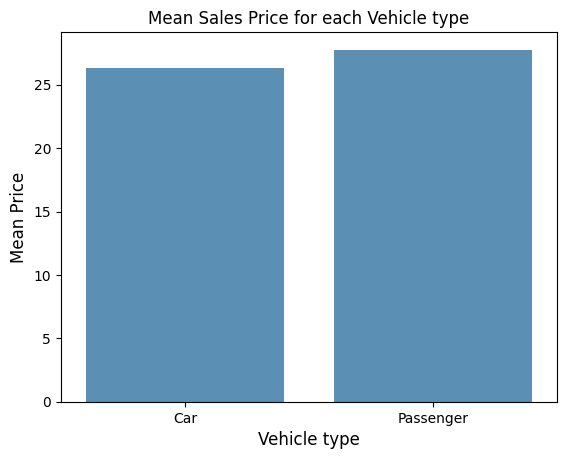

In [19]:
### Mean Price for each Vehicle_type

sns.barplot(x=mean_price_vehicle['Vehicle_type'], y=mean_price_vehicle['Price_in_thousands'], alpha = 0.8)
plt.title('Mean Sales Price for each Vehicle type')
plt.ylabel('Mean Price', fontsize = 12)
plt.xlabel('Vehicle type', fontsize = 12)
plt.show()

From the above graph, we can see that the mean sales price is similar for both the vehicle types.

# 3.2.3 Numerical variable - Sales_in_thousands

Text(0.5, 1.0, 'Distribution of the column - Sales in thousands')

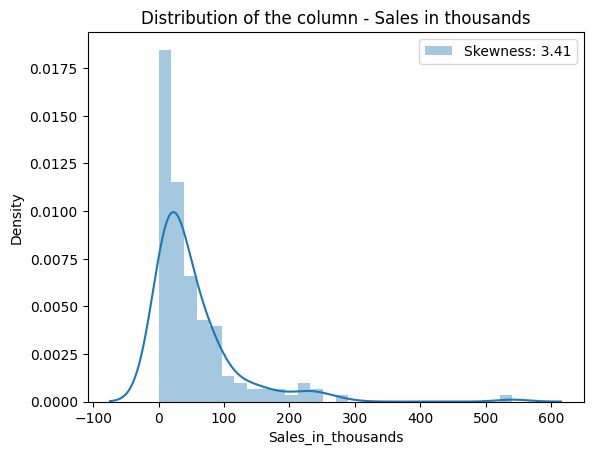

In [20]:
### Understanding the distribution of the column - Sales_in_thousands

sns.distplot(dataset['Sales_in_thousands'], label = 'Skewness: %.2f'%(dataset['Sales_in_thousands'].skew()))
plt.legend(loc = 'best')
plt.title('Distribution of the column - Sales in thousands')

From the above graph, we can see that the data is slightly skewed. We will remove this skewness during the Data Preprocessing phase.

# 3.2.4 Numerical variable - __year_resale_value

Text(0.5, 1.0, 'Distribution of the column - __year_resale_value')

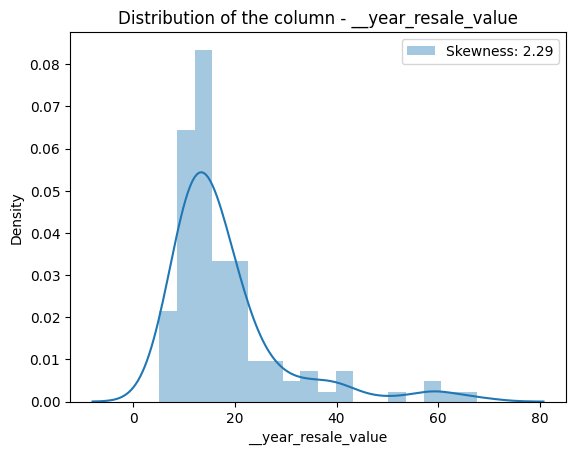

In [21]:
### Understanding the distribution of the column - __year_resale_value

sns.distplot(dataset['__year_resale_value'], label = 'Skewness: %.2f'%(dataset['__year_resale_value'].skew()))
plt.legend(loc = 'best')
plt.title('Distribution of the column - __year_resale_value')

From the above graph, we can see that the data is slightly skewed. We will remove this skewness during the Data Preprocessing phase.

# 3.2.5 Numerical variable - Price_in_thousands

Text(0.5, 1.0, 'Distribution of the column - Price_in_thousands')

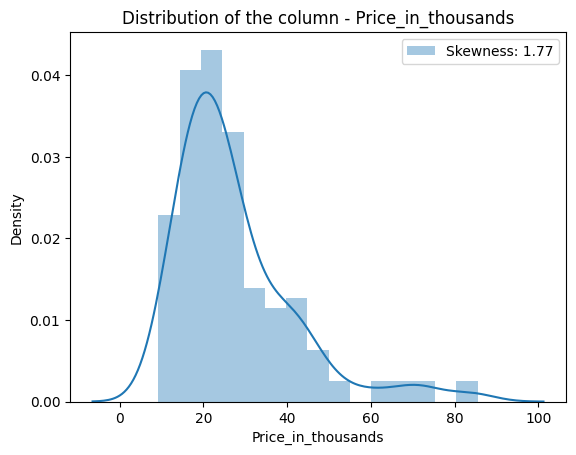

In [22]:
### Understanding the distribution of the column - Price_in_thousands

sns.distplot(dataset['Price_in_thousands'], label = 'Skewness: %.2f'%(dataset['Price_in_thousands'].skew()))
plt.legend(loc = 'best')
plt.title('Distribution of the column - Price_in_thousands')

From the above graph, we can see that the data is slightly skewed. We will remove this skewness during the Data Preprocessing phase.

# 3.2.6 Numerical variable - Engine_size

Text(0.5, 1.0, 'Distribution of the column - Engine_size')

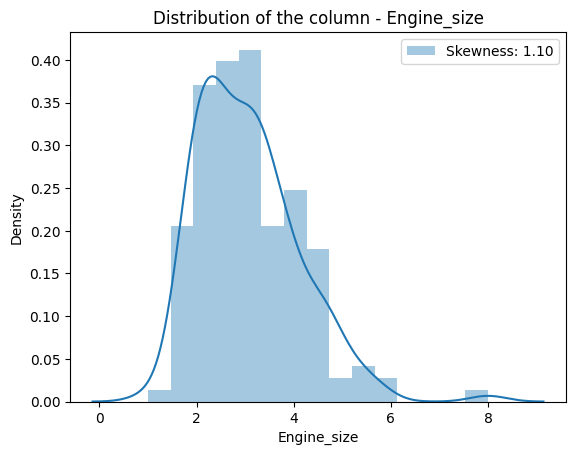

In [23]:
### Understanding the distribution of the column - Engine_size

sns.distplot(dataset['Engine_size'], label = 'Skewness: %.2f'%(dataset['Engine_size'].skew()))
plt.legend(loc = 'best')
plt.title('Distribution of the column - Engine_size')

From the above graph, we can see that the data is slightly skewed. We will remove this skewness during the Data Preprocessing phase.

# 3.2.7 Numerical variable - Horsepower

Text(0.5, 1.0, 'Distribution of the column - Horsepower')

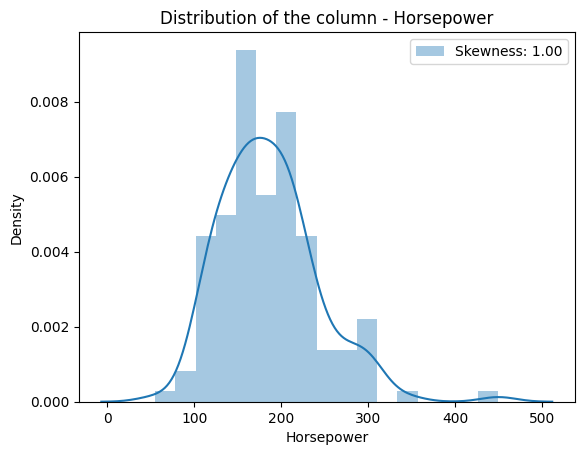

In [24]:
### Understanding the distribution of the column - Horsepower

sns.distplot(dataset['Horsepower'], label = 'Skewness: %.2f'%(dataset['Horsepower'].skew()))
plt.legend(loc = 'best')
plt.title('Distribution of the column - Horsepower')

From the above graph, we can see that the data is slightly skewed. We will remove this skewness during the Data Preprocessing phase.

# 3.2.8 Numerical variable - Wheelbase

Text(0.5, 1.0, 'Distribution of the column - Wheelbase')

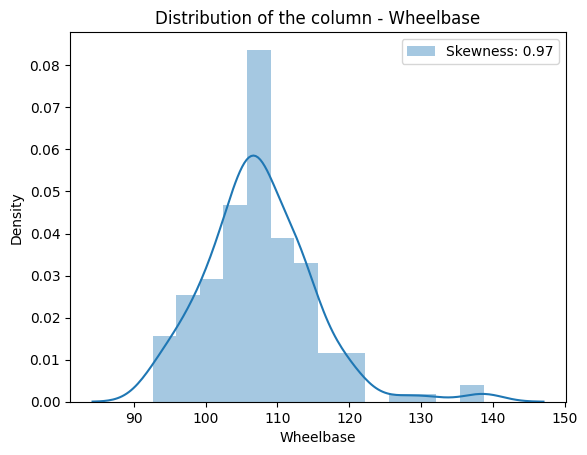

In [25]:
### Understanding the distribution of the column - Wheelbase

sns.distplot(dataset['Wheelbase'], label = 'Skewness: %.2f'%(dataset['Wheelbase'].skew()))
plt.legend(loc = 'best')
plt.title('Distribution of the column - Wheelbase')

From the above graph, we can see that the data is slightly skewed. We will remove this skewness during the Data Preprocessing phase.

# 3.2.9 Numerical variable - Width

Text(0.5, 1.0, 'Distribution of the column - Width')

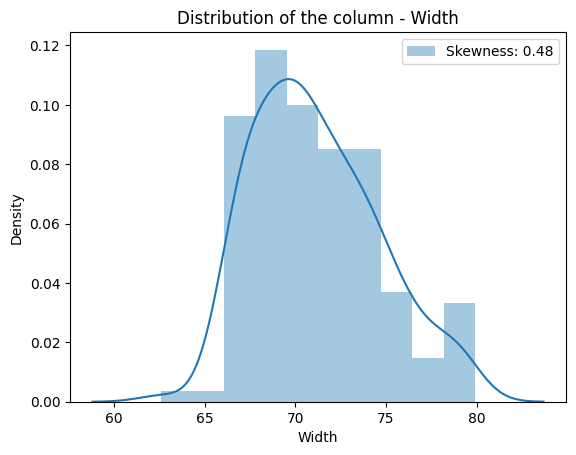

In [26]:
### Understanding the distribution of the column - Width

sns.distplot(dataset['Width'], label = 'Skewness: %.2f'%(dataset['Width'].skew()))
plt.legend(loc = 'best')
plt.title('Distribution of the column - Width')

From the above graph, we can see that the data is normally distributed.

# 3.2.10 Numerical variable - Length

Text(0.5, 1.0, 'Distribution of the column - Length')

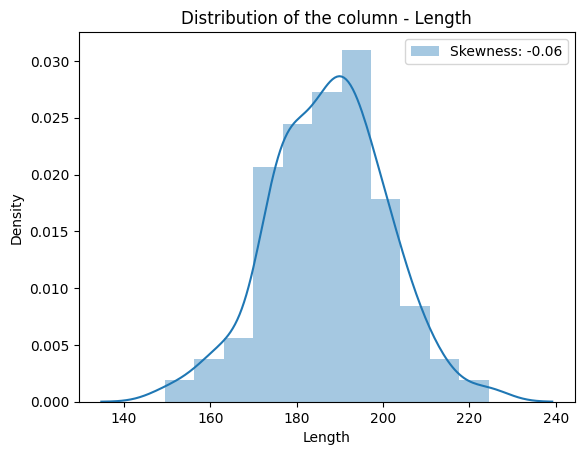

In [27]:
### Understanding the distribution of the column - Length

sns.distplot(dataset['Length'], label = 'Skewness: %.2f'%(dataset['Length'].skew()))
plt.legend(loc = 'best')
plt.title('Distribution of the column - Length')

From the above graph, we can see that the data is normally distributed.

# 3.2.11 Numerical variable - Curb_weight

Text(0.5, 1.0, 'Distribution of the column - Curb_weight')

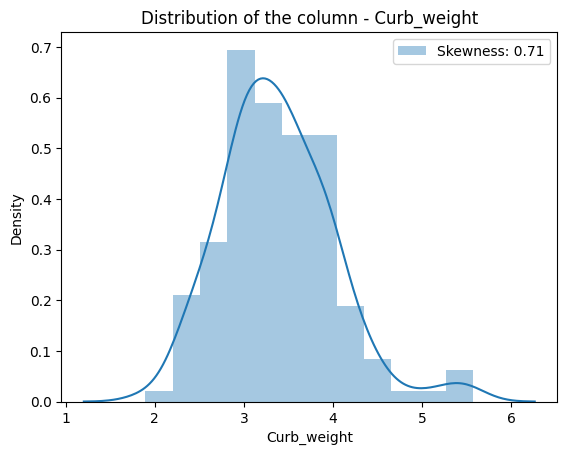

In [28]:
### Understanding the distribution of the column - Curb_weight

sns.distplot(dataset['Curb_weight'], label = 'Skewness: %.2f'%(dataset['Curb_weight'].skew()))
plt.legend(loc = 'best')
plt.title('Distribution of the column - Curb_weight')

From the above graph, we can see that the data is normally distributed.

# 3.2.12 Numerical variable - Fuel_capacity

Text(0.5, 1.0, 'Distribution of the column - Fuel_capacity')

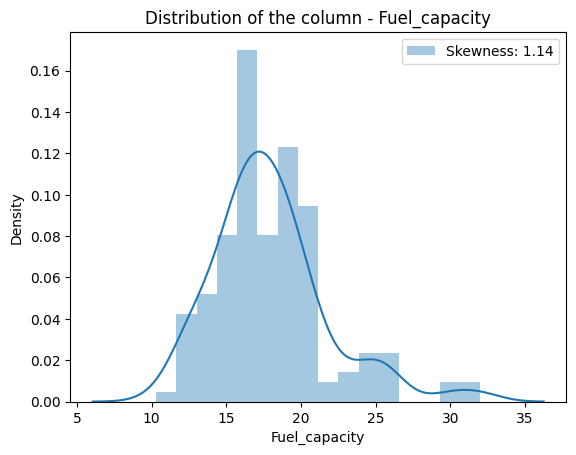

In [29]:
### Understanding the distribution of the column - Fuel_capacity

sns.distplot(dataset['Fuel_capacity'], label = 'Skewness: %.2f'%(dataset['Fuel_capacity'].skew()))
plt.legend(loc = 'best')
plt.title('Distribution of the column - Fuel_capacity')

From the above graph, we can see that the data is slightly skewed. We will remove this skewness during the Data Preprocessing phase.

# 3.2.13 Numerical variable - Fuel_efficiency

Text(0.5, 1.0, 'Distribution of the column - Fuel_efficiency')

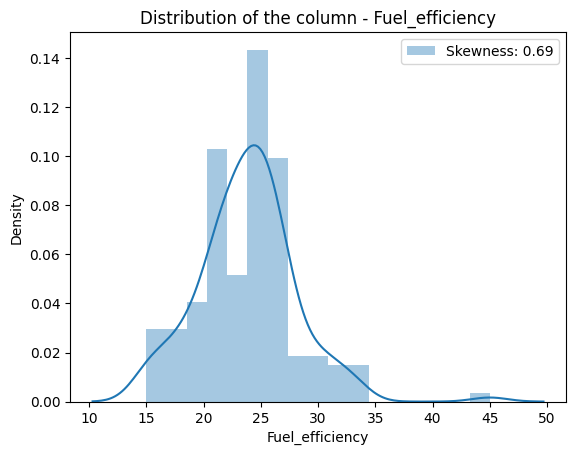

In [30]:
### Understanding the distribution of the column - Fuel_efficiency

sns.distplot(dataset['Fuel_efficiency'], label = 'Skewness: %.2f'%(dataset['Fuel_efficiency'].skew()))
plt.legend(loc = 'best')
plt.title('Distribution of the column - Fuel_efficiency')

From the above graph, we can see that the data is normally distributed.

# 3.2.14 Numerical variable - Power_perf_factor

Text(0.5, 1.0, 'Distribution of the column - Power_perf_factor')

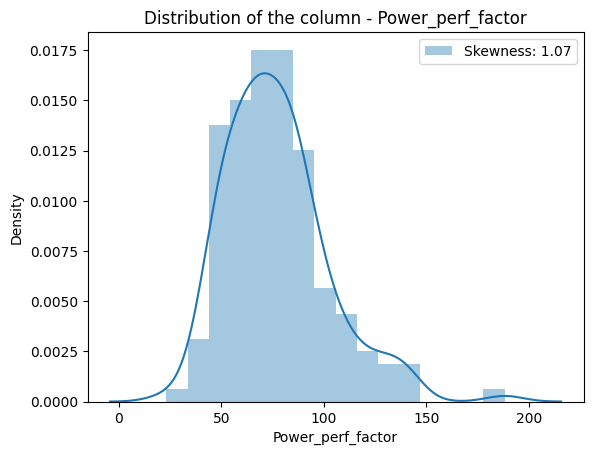

In [31]:
### Understanding the distribution of the column - Power_perf_factor

sns.distplot(dataset['Power_perf_factor'], label = 'Skewness: %.2f'%(dataset['Power_perf_factor'].skew()))
plt.legend(loc = 'best')
plt.title('Distribution of the column - Power_perf_factor')

From the above graph, we can see that the data is slightly skewed. We will remove this skewness during the Data Preprocessing phase.

# 4. Data Preprocessing

Data preprocessing is the process of getting our dataset ready for model training. In this section, we will perform the following preprocessing steps:

1. Detect and remove outliers in numerical variables
2. Drop and fill missing values
3. Feature Engineering
4. Data Trasformation
5. Feature Encoding
6. Feature Selection

#### EDA and Preprocessing - AUTOMOBILE CARS
1. Basic EDA - Info, shape
2. Handling Missing Values
3. Handling Outliers
4. Handling Skewness
5. Categorical Data Encoding
6. Data Normalization or Scaling
7. Feature Engineering

# 4.1 Detect and remove outliers in numerical variables

Outliers are data points that have extreme values and they do not conform with the majority of the data. It is important to address this because outliers tend to skew our data towards extremes and can cause inaccurate model predictions. I will use the Tukey method to remove these outliers.

Here, we will write a function that will loop through a list of features and detect outliers in each one of those features. In each loop, a data point is deemed an outlier if it is less than the first quartile minus the outlier step or exceeds third quartile plus the outlier step. The outlier step is defined as 1.5 times the interquartile range. Once the outliers have been determined for one feature, their indices will be stored in a list before proceeding to the next feature and the process repeats until the very last feature is completed. Finally, using the list with outlier indices, we will count the frequencies of the index numbers and return them if their frequency exceeds n times.

In [32]:
### Data Wrangling 
from collections import Counter


In [33]:
def detect_outliers(df, n, features_list):
    outlier_indices = [] 
    for feature in features_list: 
        Q1 = np.percentile(df[feature], 25)
        Q3 = np.percentile(df[feature], 75)
        IQR = Q3 - Q1
        outlier_step = 1.5 * IQR 
        outlier_list_col = df[(df[feature] < Q1 - outlier_step) | (df[feature] > Q3 + outlier_step)].index
        outlier_indices.extend(outlier_list_col) 
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(key for key, value in outlier_indices.items() if value > n) 
    return multiple_outliers

outliers_to_drop = detect_outliers(dataset, 2, ['Sales_in_thousands', '__year_resale_value', 'Price_in_thousands', 
                                               'Engine_size', 'Horsepower', 'Wheelbase', 'Width', 'Length', 'Curb_weight',
                                               'Fuel_capacity', 'Fuel_efficiency', 'Power_perf_factor'])
print("We will drop these {} indices: ".format(len(outliers_to_drop)), outliers_to_drop)

We will drop these 0 indices:  []


From the above cell, we can see that there are no outliers in the data.

In [34]:
#code to seprate numeric and categorical columns and store in DF.
cat_cols = [col for col in dataset.columns if dataset[col].dtype == 'object']
num_cols = [col for col in dataset.columns if dataset[col].dtype != 'object']

for col in cat_cols:
    print(f"{col} has {dataset[col].nunique()} values\n")

Latest_Launch has 130 values



# 4.2 Drop and fill missing values

We will first remove the records that have missing Price_in_thousands.

In [35]:
### Filtering the rows that has a value in the column - Price_in_thousands

modified_dataset = dataset[dataset['Price_in_thousands'].notna()]
modified_dataset

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639
5,Audi,A6,18.780,23.555,Passenger,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,8/9/2011,84.565105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Volvo,V40,3.545,NaN,Passenger,24.40,1.9,160.0,100.5,67.6,176.6,3.042,15.8,25.0,9/21/2011,66.498812
153,Volvo,S70,15.245,NaN,Passenger,27.50,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25.0,11/24/2012,70.654495
154,Volvo,V70,17.531,NaN,Passenger,28.80,2.4,168.0,104.9,69.3,186.2,3.259,17.9,25.0,6/25/2011,71.155978
155,Volvo,C70,3.493,NaN,Passenger,45.50,2.3,236.0,104.9,71.5,185.7,3.601,18.5,23.0,4/26/2011,101.623357


In [36]:
### Looking at the missing values in the dataset

modified_dataset.isnull().sum().sort_values(ascending = False)

__year_resale_value    36
Fuel_efficiency         2
Curb_weight             1
Manufacturer            0
Vehicle_type            0
Price_in_thousands      0
Model                   0
Sales_in_thousands      0
Horsepower              0
Engine_size             0
Width                   0
Wheelbase               0
Length                  0
Fuel_capacity           0
Latest_Launch           0
Power_perf_factor       0
dtype: int64

From the modified dataset, we can see that there are missing values in the columns - __year_resale_value, Fuel_efficiency, Curb_weight.

# 4.2.1 Handling missing values - __year_resale_value

In [37]:
### Replacing the missing values in the column - __year_resale_value using median

year_index = list(~modified_dataset['__year_resale_value'].isnull())
median_year = np.median(modified_dataset['__year_resale_value'].loc[year_index])
median_year

np.float64(14.01)

In [38]:
### Replacing the missing values of the column - __year_resale_value in the dataset

modified_dataset['__year_resale_value'].fillna(median_year, inplace = True)

In [39]:
### Checking if there are any missing values of __year_resale_value in the dataset

modified_dataset['__year_resale_value'].isnull().sum()

np.int64(0)

# 4.2.2 Handling missing values - Fuel_efficiency

In [40]:
### Replacing the missing values in the column - Fuel_efficiency using median



fuel_index = list(~modified_dataset['Fuel_efficiency'].isnull())
median_fuel = np.median(modified_dataset['Fuel_efficiency'].loc[fuel_index])
median_fuel

np.float64(24.0)

In [41]:
### Replacing the missing values of the column - Fuel_efficiency in the dataset

modified_dataset['Fuel_efficiency'].fillna(median_year, inplace = True)

In [42]:
### Checking if there are any missing values of Fuel_efficiency in the dataset

modified_dataset['Fuel_efficiency'].isnull().sum()

np.int64(0)

# 4.2.3 Handling missing values - Curb_weight

In [43]:
### Replacing the missing values in the column - Curb_weight using median

curb_index = list(~modified_dataset['Curb_weight'].isnull())
median_curb = np.median(modified_dataset['Curb_weight'].loc[curb_index])
median_curb

np.float64(3.341)

In [44]:
### Replacing the missing values of the column - Curb_weight in the dataset

modified_dataset['Curb_weight'].fillna(median_curb, inplace = True)

In [45]:
### Checking if there are any missing values of Curb_weight in the dataset

modified_dataset['Curb_weight'].isnull().sum()

np.int64(0)

# 4.2.4 Dropping unnecessary columns

Here, we will drop the columns - Model from the dataset.

In [46]:
### Dropping the columns - Model

modified_dataset.drop(['Model'], axis = 1, inplace = True)
modified_dataset

,Manufacturer,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
3,Acura,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639
5,Audi,18.780,23.555,Passenger,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,8/9/2011,84.565105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Volvo,3.545,14.010,Passenger,24.40,1.9,160.0,100.5,67.6,176.6,3.042,15.8,25.0,9/21/2011,66.498812
153,Volvo,15.245,14.010,Passenger,27.50,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25.0,11/24/2012,70.654495
154,Volvo,17.531,14.010,Passenger,28.80,2.4,168.0,104.9,69.3,186.2,3.259,17.9,25.0,6/25/2011,71.155978
155,Volvo,3.493,14.010,Passenger,45.50,2.3,236.0,104.9,71.5,185.7,3.601,18.5,23.0,4/26/2011,101.623357


# 4.3 Feature Engineering

Feature engineering is arguably the most important art in machine learning. It is the process of creating new features from existing features to better represent the underlying problem to the predictive models resulting in improved model accuracy on unseen data.

Here, we focus on creating new columns for:

1. NewManufacturer - using the column Manufacturer
2. Age - using the column Latest_Launch

# 4.3.1 NewManufacturer - using the column Manufacturer

Here, we will create the NewManufacturer column such that if the mean price of a Manufacturer is less than 30 then it belongs to class 1, else class 2.

In [47]:
### Seperating the Manufacturers into class 1 and 2

class_1 = []
class_2 = []

for index in range(len(mean_price_manufacturer)):
    if mean_price_manufacturer.iloc[index, 1] <= 30:
        class_1.append(mean_price_manufacturer.iloc[index, 0])
    else:
        class_2.append(mean_price_manufacturer.iloc[index, 0])
        
print('Manufacturers with less than 30 mean price: ', class_1)
print('Manufacturers with more than 30 mean price: ', class_2)

Manufacturers with less than 30 mean price:  ['Buick', 'Chevrolet', 'Chrysler', 'Dodge', 'Ford', 'Honda', 'Hyundai', 'Infiniti', 'Jeep', 'Mercury', 'Mitsubishi', 'Nissan', 'Oldsmobile', 'Plymouth', 'Pontiac', 'Saab', 'Saturn', 'Subaru', 'Toyota', 'Volkswagen']
Manufacturers with more than 30 mean price:  ['Acura', 'Audi', 'BMW', 'Cadillac', 'Jaguar', 'Lexus', 'Lincoln', 'Mercedes-B', 'Porsche', 'Volvo']


In [48]:
### Modifying the Manufacturer column in the dataset

manufacturer_data = modified_dataset['Manufacturer']
new_manufacturer_data = []

for value in manufacturer_data:
    if value in class_1:
        new_manufacturer_data.append(1)
    else:
        new_manufacturer_data.append(2)
        
modified_dataset['Manufacturer'] = new_manufacturer_data

In [49]:
### Looking at the modified dataset

modified_dataset

,Manufacturer,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,2,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,2,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
3,2,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,2,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639
5,2,18.780,23.555,Passenger,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,8/9/2011,84.565105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,2,3.545,14.010,Passenger,24.40,1.9,160.0,100.5,67.6,176.6,3.042,15.8,25.0,9/21/2011,66.498812
153,2,15.245,14.010,Passenger,27.50,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25.0,11/24/2012,70.654495
154,2,17.531,14.010,Passenger,28.80,2.4,168.0,104.9,69.3,186.2,3.259,17.9,25.0,6/25/2011,71.155978
155,2,3.493,14.010,Passenger,45.50,2.3,236.0,104.9,71.5,185.7,3.601,18.5,23.0,4/26/2011,101.623357


# 4.3.2 Age - using the column Latest_Launch

Here, we will create the Age column using the formula 2022 - year value.

In [50]:
### Creating the Age data

age_data = []
launch_data = modified_dataset['Latest_Launch']

for value in launch_data:
    year = int(value.split('/')[-1])
    age_data.append(2022 - year)

In [51]:
### Adding the Age column

modified_dataset['Age'] = age_data
modified_dataset

,Manufacturer,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor,Age
0,2,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150,10
1,2,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778,11
3,2,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779,11
4,2,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639,11
5,2,18.780,23.555,Passenger,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,8/9/2011,84.565105,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,2,3.545,14.010,Passenger,24.40,1.9,160.0,100.5,67.6,176.6,3.042,15.8,25.0,9/21/2011,66.498812,11
153,2,15.245,14.010,Passenger,27.50,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25.0,11/24/2012,70.654495,10
154,2,17.531,14.010,Passenger,28.80,2.4,168.0,104.9,69.3,186.2,3.259,17.9,25.0,6/25/2011,71.155978,11
155,2,3.493,14.010,Passenger,45.50,2.3,236.0,104.9,71.5,185.7,3.601,18.5,23.0,4/26/2011,101.623357,11


Text(0.5, 1.0, 'Distribution of the column - Age')

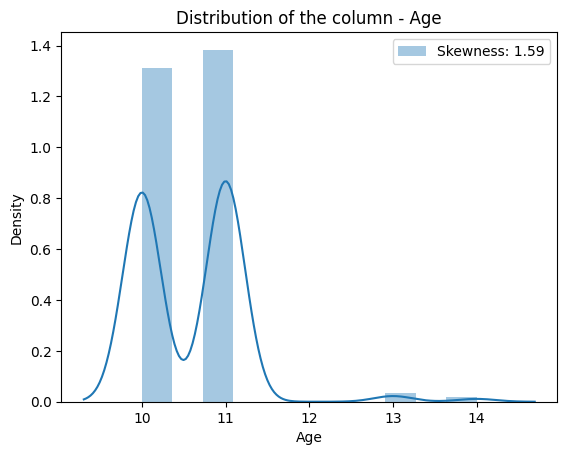

In [52]:
### Understanding the distribution of the column - Age

sns.distplot(modified_dataset['Age'], label = 'Skewness: %.2f'%(modified_dataset['Age'].skew()))
plt.legend(loc = 'best')
plt.title('Distribution of the column - Age')

From the above graph, we can see that there are only 3 main values for this column.

In [53]:
### Dropping the column - Latest_Launch

modified_dataset.drop(['Latest_Launch'], axis = 1, inplace = True)

In [54]:
### Looking at the modified dataset

modified_dataset

,Manufacturer,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor,Age
0,2,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,58.280150,10
1,2,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,91.370778,11
3,2,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,91.389779,11
4,2,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,62.777639,11
5,2,18.780,23.555,Passenger,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,84.565105,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,2,3.545,14.010,Passenger,24.40,1.9,160.0,100.5,67.6,176.6,3.042,15.8,25.0,66.498812,11
153,2,15.245,14.010,Passenger,27.50,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25.0,70.654495,10
154,2,17.531,14.010,Passenger,28.80,2.4,168.0,104.9,69.3,186.2,3.259,17.9,25.0,71.155978,11
155,2,3.493,14.010,Passenger,45.50,2.3,236.0,104.9,71.5,185.7,3.601,18.5,23.0,101.623357,11


# 4.4 Data Transformation

In this section, we will remove the skewness present in the columns - Sales_in_thousands, __year_resale_value, Engine_size, Horsepower, Fuel_capacity, Power_perf_factor by using a Box-Cox transformation on the data. Then, we will normalize all the numerical columns apart from the Target using MinMax Normalization.

# 4.4.1 Box Cox transforming the column - Sales_in_thousands

Text(0.5, 1.0, 'Distribution of the column - Sales_in_thousands')

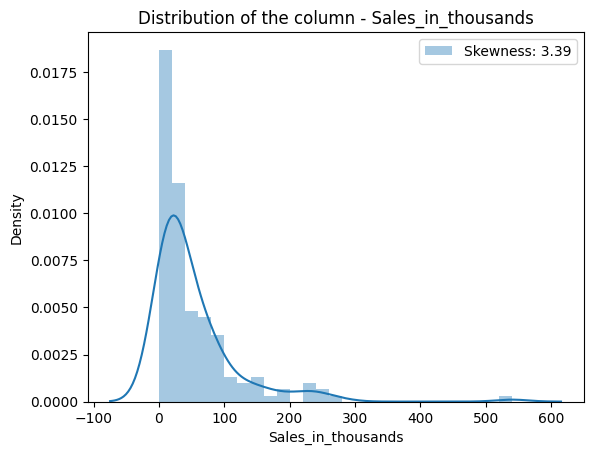

In [55]:
### Understanding the distribution of the column - Sales_in_thousands

sns.distplot(modified_dataset['Sales_in_thousands'], label = 'Skewness: %.2f'%(modified_dataset['Sales_in_thousands'].skew()))
plt.legend(loc = 'best')
plt.title('Distribution of the column - Sales_in_thousands')

Text(0.5, 1.0, 'Distribution of the column - Sales_in_thousands')

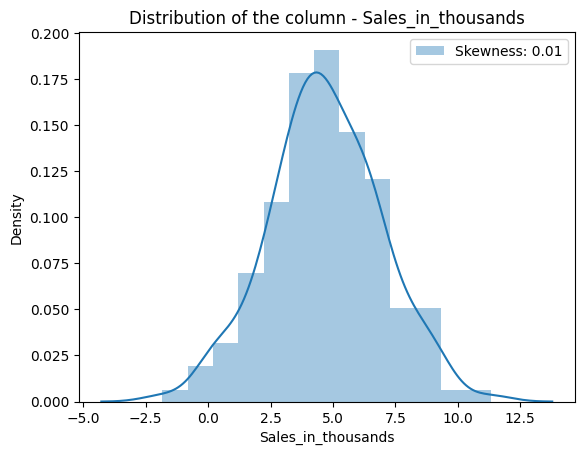

In [56]:
### Understanding the distribution of the data Box_Cox(Sales_in_thousands)

sales_data = [1 if value == 0 else value for value in modified_dataset['Sales_in_thousands']]

modified_sales, _ = stats.boxcox(sales_data)
modified_dataset['Sales_in_thousands'] = modified_sales

sns.distplot(modified_dataset['Sales_in_thousands'], label = 'Skewness: %.2f'%(modified_dataset['Sales_in_thousands'].skew()))
plt.legend(loc = 'best')
plt.title('Distribution of the column - Sales_in_thousands')

From the above graph, we can see that most of the skewness is removed.

# 4.4.2 Box Cox transforming the column - __year_resale_value

Text(0.5, 1.0, 'Distribution of the column - __year_resale_value')

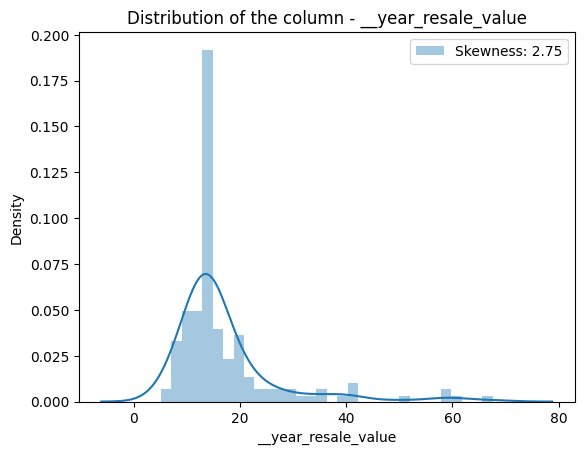

In [57]:
### Understanding the distribution of the column - __year_resale_value

sns.distplot(modified_dataset['__year_resale_value'], label = 'Skewness: %.2f'%(modified_dataset['__year_resale_value'].skew()))
plt.legend(loc = 'best')
plt.title('Distribution of the column - __year_resale_value')

In [58]:
!pip install statsmodels

Defaulting to user installation because normal site-packages is not writeable


In [59]:
### Data Preprocessing

import statsmodels.api as sm
from scipy import stats

Text(0.5, 1.0, 'Distribution of the column - __year_resale_value')

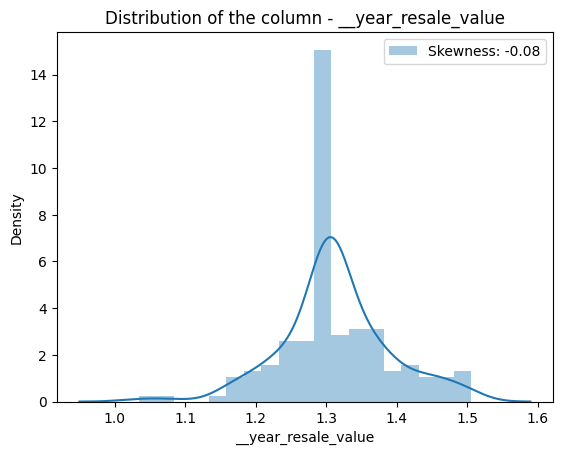

In [60]:
### Understanding the distribution of the data Box_Cox(__year_resale_value)

year_data = [1 if value == 0 else value for value in modified_dataset['__year_resale_value']]

modified_year, _ = stats.boxcox(year_data)
modified_dataset['__year_resale_value'] = modified_year

sns.distplot(modified_dataset['__year_resale_value'], label = 'Skewness: %.2f'%(modified_dataset['__year_resale_value'].skew()))
plt.legend(loc = 'best')
plt.title('Distribution of the column - __year_resale_value')

From the above graph, we can see that most of the skewness is removed.

# 4.4.3 Box Cox transforming the column - Engine_size

Text(0.5, 1.0, 'Distribution of the column - Engine_size')

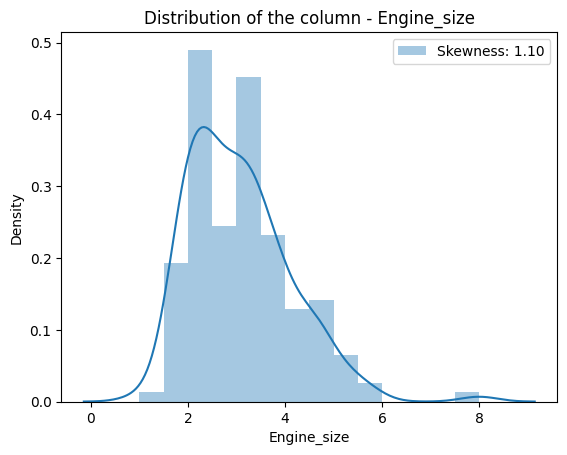

In [61]:
### Understanding the distribution of the column - Engine_size

sns.distplot(modified_dataset['Engine_size'], label = 'Skewness: %.2f'%(modified_dataset['Engine_size'].skew()))
plt.legend(loc = 'best')
plt.title('Distribution of the column - Engine_size')

Text(0.5, 1.0, 'Distribution of the column - Engine_size')

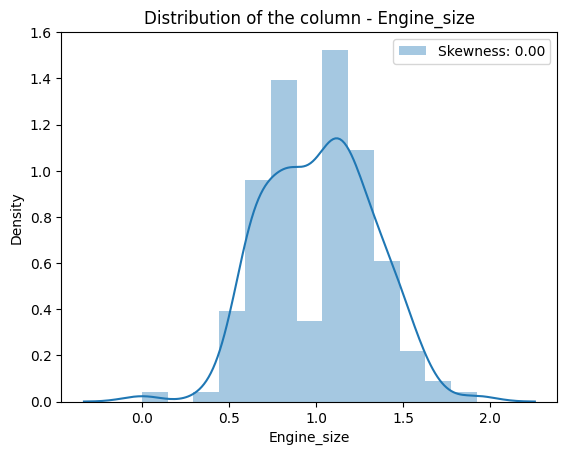

In [62]:
### Understanding the distribution of the data Box_Cox(Engine_size)

engine_data = [1 if value == 0 else value for value in modified_dataset['Engine_size']]

modified_engine, _ = stats.boxcox(engine_data)
modified_dataset['Engine_size'] = modified_engine

sns.distplot(modified_dataset['Engine_size'], label = 'Skewness: %.2f'%(modified_dataset['Engine_size'].skew()))
plt.legend(loc = 'best')
plt.title('Distribution of the column - Engine_size')

From the above graph, we can see that most of the skewness is removed.

# 4.4.4 Box Cox transforming the column - Horsepower

Text(0.5, 1.0, 'Distribution of the column - Horsepower')

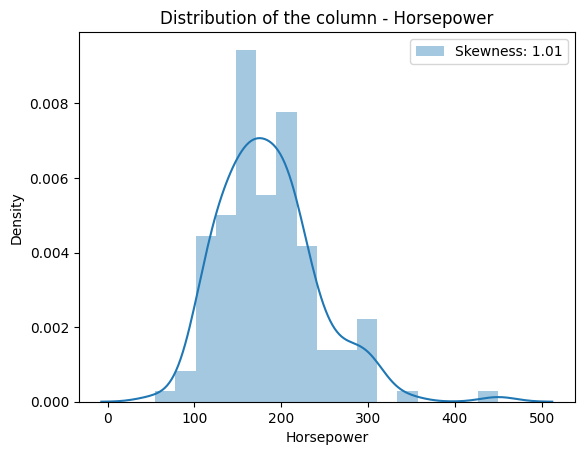

In [63]:
### Understanding the distribution of the column - Horsepower

sns.distplot(modified_dataset['Horsepower'], label = 'Skewness: %.2f'%(modified_dataset['Horsepower'].skew()))
plt.legend(loc = 'best')
plt.title('Distribution of the column - Horsepower')

Text(0.5, 1.0, 'Distribution of the column - Horsepower')

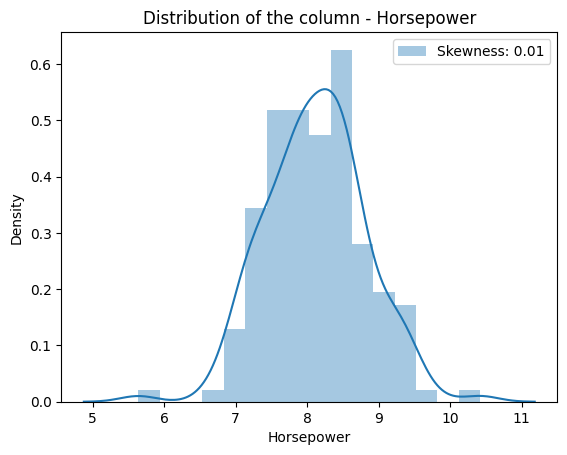

In [64]:
### Understanding the distribution of the data Box_Cox(Horsepower)

horsepower_data = [1 if value == 0 else value for value in modified_dataset['Horsepower']]

modified_horsepower, _ = stats.boxcox(horsepower_data)
modified_dataset['Horsepower'] = modified_horsepower

sns.distplot(modified_dataset['Horsepower'], label = 'Skewness: %.2f'%(modified_dataset['Horsepower'].skew()))
plt.legend(loc = 'best')
plt.title('Distribution of the column - Horsepower')

From the above graph, we can see that most of the skewness is removed.

# 4.4.5 Box Cox transforming the column - Fuel_capacity

Text(0.5, 1.0, 'Distribution of the column - Fuel_capacity')

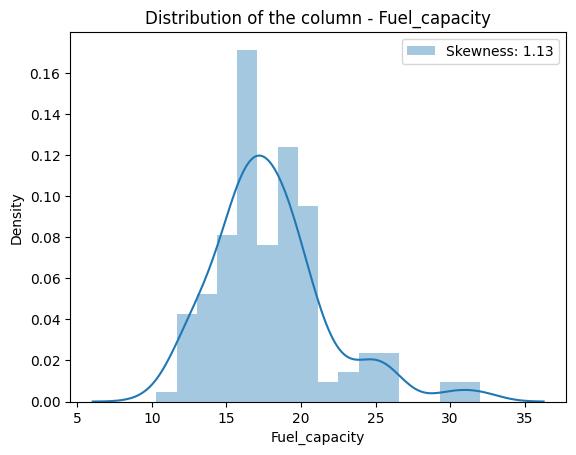

In [65]:
### Understanding the distribution of the column - Fuel_capacity

sns.distplot(modified_dataset['Fuel_capacity'], label = 'Skewness: %.2f'%(modified_dataset['Fuel_capacity'].skew()))
plt.legend(loc = 'best')
plt.title('Distribution of the column - Fuel_capacity')

Text(0.5, 1.0, 'Distribution of the column - Fuel_capacity')

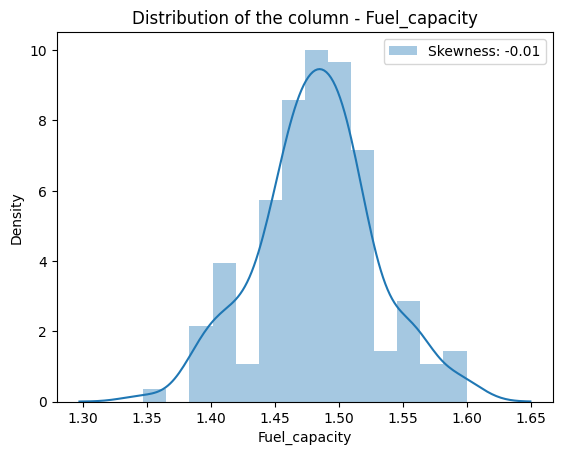

In [66]:
### Understanding the distribution of the data Box_Cox(Fuel_capacity)

fuel_data = [1 if value == 0 else value for value in modified_dataset['Fuel_capacity']]

modified_fuel, _ = stats.boxcox(fuel_data)
modified_dataset['Fuel_capacity'] = modified_fuel

sns.distplot(modified_dataset['Fuel_capacity'], label = 'Skewness: %.2f'%(modified_dataset['Fuel_capacity'].skew()))
plt.legend(loc = 'best')
plt.title('Distribution of the column - Fuel_capacity')

From the above graph, we can see that most of the skewness is removed.

# 4.4.6 Box Cox transforming the column - Power_perf_factor

Text(0.5, 1.0, 'Distribution of the column - Power_perf_factor')

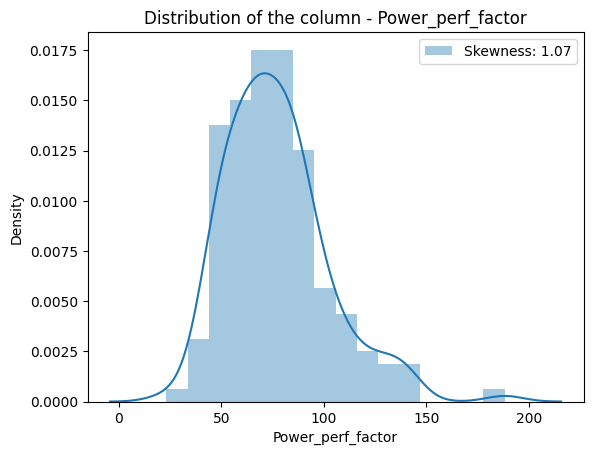

In [67]:
### Understanding the distribution of the column - Power_perf_factor

sns.distplot(modified_dataset['Power_perf_factor'], label = 'Skewness: %.2f'%(modified_dataset['Power_perf_factor'].skew()))
plt.legend(loc = 'best')
plt.title('Distribution of the column - Power_perf_factor')

Text(0.5, 1.0, 'Distribution of the column - Power_perf_factor')

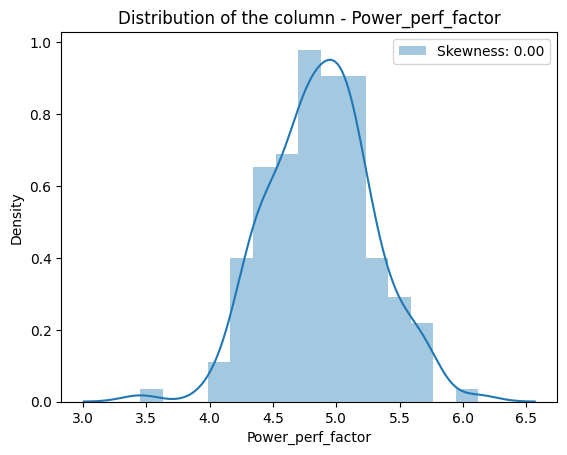

In [68]:
### Understanding the distribution of the data Box_Cox(Power_perf_factor)

power_data = [1 if value == 0 else value for value in modified_dataset['Power_perf_factor']]

modified_power, _ = stats.boxcox(power_data)
modified_dataset['Power_perf_factor'] = modified_power

sns.distplot(modified_dataset['Power_perf_factor'], label = 'Skewness: %.2f'%(modified_dataset['Power_perf_factor'].skew()))
plt.legend(loc = 'best')
plt.title('Distribution of the column - Power_perf_factor')

From the above graph, we can see that most of the skewness is removed.

# 4.4.7 Normalizing the numerical columns  / feature scaling

In [69]:
### A function to normalize numerical columns

def normalize_columns(dataframe, column):
    data = dataframe[column]
    mini = min(data)
    maxi = max(data)
    
    new_data = []
    for value in data:
        new_data.append((value - mini)/(maxi - mini))
    
    dataframe[column] = new_data

numerical_columns = ['Sales_in_thousands', '__year_resale_value', 'Engine_size', 'Horsepower', 'Wheelbase', 'Width',
                    'Length', 'Curb_weight', 'Fuel_capacity', 'Fuel_efficiency', 'Power_perf_factor', 'Age']
for each_column in numerical_columns:
    normalize_columns(modified_dataset, each_column)

### Optional in ML  Feature Scaling

In [70]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# scaler.fit(df[['total_bill']]) #it will calculate mu and sigma
# scaler.transform(df[['total_bill']])


# #Normalization/minmax scaling
# from sklearn.preprocessing import MinMaxScaler
# min_max = MinMaxScaler()
# min_max.fit_transform(df[['total_bill', 'tip']])

# min_max.transform([[10, 8]])


# #unit vector
# from sklearn.preprocessing import normalize
# normalize(df[['total_bill', 'tip']])


# #robust scaling >> you have outliers the data 
# #X-median/IQR
# from sklearn.preprocessing import RobustScaler
# from sklearn.preprocessing import RobustScaler

# rs = RobustScaler()
# rs.fit_transform(df[['total_bill', 'tip']])

## ====================


In [71]:
### Looking at the sample records of the modified dataset

modified_dataset

,Manufacturer,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor,Age
0,2,0.415747,0.639523,Passenger,21.50,0.298740,0.402920,0.186551,0.271676,0.306258,0.202339,0.272054,0.451436,0.424314,0.00
1,2,0.527954,0.709378,Passenger,28.40,0.578616,0.632042,0.336226,0.445087,0.579228,0.441120,0.525932,0.354631,0.640585,0.25
3,2,0.336772,0.829878,Passenger,42.00,0.621123,0.597623,0.477223,0.508671,0.628495,0.531683,0.566108,0.257825,0.640686,0.25
4,2,0.439190,0.746298,Passenger,23.99,0.298740,0.435156,0.216920,0.323699,0.380826,0.299973,0.482804,0.419167,0.459679,0.25
5,2,0.428740,0.763885,Passenger,33.95,0.514740,0.573513,0.349241,0.780347,0.567244,0.453087,0.589864,0.257825,0.602953,0.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,2,0.246636,0.577568,Passenger,24.40,0.325560,0.465637,0.171367,0.289017,0.362184,0.311939,0.448297,0.354631,0.487180,0.25
153,2,0.403006,0.577568,Passenger,27.50,0.440196,0.488893,0.266811,0.387283,0.486019,0.357085,0.561236,0.354631,0.516228,0.00
154,2,0.420145,0.577568,Passenger,28.80,0.440196,0.488893,0.266811,0.387283,0.490013,0.370955,0.561236,0.354631,0.519624,0.25
155,2,0.245244,0.577568,Passenger,45.50,0.419462,0.656080,0.266811,0.514451,0.483356,0.463965,0.589864,0.290094,0.692564,0.25


# 4.5 Feature Encoding

Feature encoding is the process of turning categorical data in a dataset into numerical data. It is essential that we perform feature encoding because most machine learning models can only interpret numerical data and not data in text form.

Here, we will use One Hot Encoding for the columns - Manufacturer, Vehicle_type.

In [72]:
### One Hot Encoding the columns - Manufacturer, Vehicle_type of the modified dataset

encoded_dataset = pd.get_dummies(data = modified_dataset, columns = ['Manufacturer', 'Vehicle_type'])
encoded_dataset

,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor,Age,Manufacturer_1,Manufacturer_2,Vehicle_type_Car,Vehicle_type_Passenger
0,0.415747,0.639523,21.50,0.298740,0.402920,0.186551,0.271676,0.306258,0.202339,0.272054,0.451436,0.424314,0.00,False,True,False,True
1,0.527954,0.709378,28.40,0.578616,0.632042,0.336226,0.445087,0.579228,0.441120,0.525932,0.354631,0.640585,0.25,False,True,False,True
3,0.336772,0.829878,42.00,0.621123,0.597623,0.477223,0.508671,0.628495,0.531683,0.566108,0.257825,0.640686,0.25,False,True,False,True
4,0.439190,0.746298,23.99,0.298740,0.435156,0.216920,0.323699,0.380826,0.299973,0.482804,0.419167,0.459679,0.25,False,True,False,True
5,0.428740,0.763885,33.95,0.514740,0.573513,0.349241,0.780347,0.567244,0.453087,0.589864,0.257825,0.602953,0.25,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,0.246636,0.577568,24.40,0.325560,0.465637,0.171367,0.289017,0.362184,0.311939,0.448297,0.354631,0.487180,0.25,False,True,False,True
153,0.403006,0.577568,27.50,0.440196,0.488893,0.266811,0.387283,0.486019,0.357085,0.561236,0.354631,0.516228,0.00,False,True,False,True
154,0.420145,0.577568,28.80,0.440196,0.488893,0.266811,0.387283,0.490013,0.370955,0.561236,0.354631,0.519624,0.25,False,True,False,True
155,0.245244,0.577568,45.50,0.419462,0.656080,0.266811,0.514451,0.483356,0.463965,0.589864,0.290094,0.692564,0.25,False,True,False,True


In [73]:
### Create the column - Target using Price_in_thousands

target_data = encoded_dataset['Price_in_thousands']
encoded_dataset['Target'] = target_data

### Dropping the column - Price_in_thousands

encoded_dataset.drop(['Price_in_thousands'], axis = 1, inplace = True)
encoded_dataset

,Sales_in_thousands,__year_resale_value,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor,Age,Manufacturer_1,Manufacturer_2,Vehicle_type_Car,Vehicle_type_Passenger,Target
0,0.415747,0.639523,0.298740,0.402920,0.186551,0.271676,0.306258,0.202339,0.272054,0.451436,0.424314,0.00,False,True,False,True,21.50
1,0.527954,0.709378,0.578616,0.632042,0.336226,0.445087,0.579228,0.441120,0.525932,0.354631,0.640585,0.25,False,True,False,True,28.40
3,0.336772,0.829878,0.621123,0.597623,0.477223,0.508671,0.628495,0.531683,0.566108,0.257825,0.640686,0.25,False,True,False,True,42.00
4,0.439190,0.746298,0.298740,0.435156,0.216920,0.323699,0.380826,0.299973,0.482804,0.419167,0.459679,0.25,False,True,False,True,23.99
5,0.428740,0.763885,0.514740,0.573513,0.349241,0.780347,0.567244,0.453087,0.589864,0.257825,0.602953,0.25,False,True,False,True,33.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,0.246636,0.577568,0.325560,0.465637,0.171367,0.289017,0.362184,0.311939,0.448297,0.354631,0.487180,0.25,False,True,False,True,24.40
153,0.403006,0.577568,0.440196,0.488893,0.266811,0.387283,0.486019,0.357085,0.561236,0.354631,0.516228,0.00,False,True,False,True,27.50
154,0.420145,0.577568,0.440196,0.488893,0.266811,0.387283,0.490013,0.370955,0.561236,0.354631,0.519624,0.25,False,True,False,True,28.80
155,0.245244,0.577568,0.419462,0.656080,0.266811,0.514451,0.483356,0.463965,0.589864,0.290094,0.692564,0.25,False,True,False,True,45.50


In [74]:
#data encoding >> converting categorical column to numeric
#Nominal/OHE
#label and ordinal encoding
#target guided ordinal encoding

In [75]:
### Feature Encoding

# import pandas as pd
1
# #using pandas
# pd.get_dummies(df['status'], drop_first=True, dtype = 'int')

2 

# from sklearn.preprocessing import OneHotEncoder
# df = pd.DataFrame({'status': ['Single', 'Married', 'Single', 'Relationship', 'Married', 'Single']})

# encoder = OneHotEncoder()
# encoder

# encoded = encoder.fit_transform(df[['status']]).toarray()

# encoder.get_feature_names_out()

# encoder_df = pd.DataFrame(encoded, columns = encoder.get_feature_names_out())

# final_df = pd.concat([df, encoder_df], axis = 1)


3``
# # ==================
# from sklearn.preprocessing import LabelEncoder
# label_encoder = LabelEncoder()
# label_encoder.fit_transform(df[['status']])

4
# ============================
# from sklearn.preprocessing import OrdinalEncoder

# df = pd.DataFrame({"qualification": ["HS", "PG","GR", "HS", "PhD", "HS", "PG"]})
# encoder = OrdinalEncoder(categories = [["HS", "GR", "PG", "PhD"]])

# encoder.fit_transform(df[['qualification']])

# #Top 5/top 10>> atleast 70 or 80 precnt of the categorical column captured
# df.qualification.value_counts()

SyntaxError: invalid syntax (2589581166.py, line 25)

# 4.6 Feature Selection

Feature selection is the process of reducing the number of input variables when developing a predictive model. It is desirable to reduce the number of input variables to both reduce the computational cost of modeling and, in some cases, to improve the performance of the model.

# 4.6.1 Plotting the correlation matrix for the numerical columns

In [86]:
### Creating a filter_dataset

filter_dataset = encoded_dataset[['Sales_in_thousands', '__year_resale_value', 'Engine_size', 'Horsepower', 'Wheelbase', 
                                  'Width', 'Length', 'Curb_weight', 'Fuel_capacity', 'Fuel_efficiency', 'Power_perf_factor',
                                  'Age']]
filter_dataset

,Sales_in_thousands,__year_resale_value,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor,Age
0,0.415747,0.639523,0.298740,0.402920,0.186551,0.271676,0.306258,0.202339,0.272054,0.451436,0.424314,0.00
1,0.527954,0.709378,0.578616,0.632042,0.336226,0.445087,0.579228,0.441120,0.525932,0.354631,0.640585,0.25
3,0.336772,0.829878,0.621123,0.597623,0.477223,0.508671,0.628495,0.531683,0.566108,0.257825,0.640686,0.25
4,0.439190,0.746298,0.298740,0.435156,0.216920,0.323699,0.380826,0.299973,0.482804,0.419167,0.459679,0.25
5,0.428740,0.763885,0.514740,0.573513,0.349241,0.780347,0.567244,0.453087,0.589864,0.257825,0.602953,0.25
...,...,...,...,...,...,...,...,...,...,...,...,...
152,0.246636,0.577568,0.325560,0.465637,0.171367,0.289017,0.362184,0.311939,0.448297,0.354631,0.487180,0.25
153,0.403006,0.577568,0.440196,0.488893,0.266811,0.387283,0.486019,0.357085,0.561236,0.354631,0.516228,0.00
154,0.420145,0.577568,0.440196,0.488893,0.266811,0.387283,0.490013,0.370955,0.561236,0.354631,0.519624,0.25
155,0.245244,0.577568,0.419462,0.656080,0.266811,0.514451,0.483356,0.463965,0.589864,0.290094,0.692564,0.25


Text(0.5, 1.0, 'Correlation Heatmap')

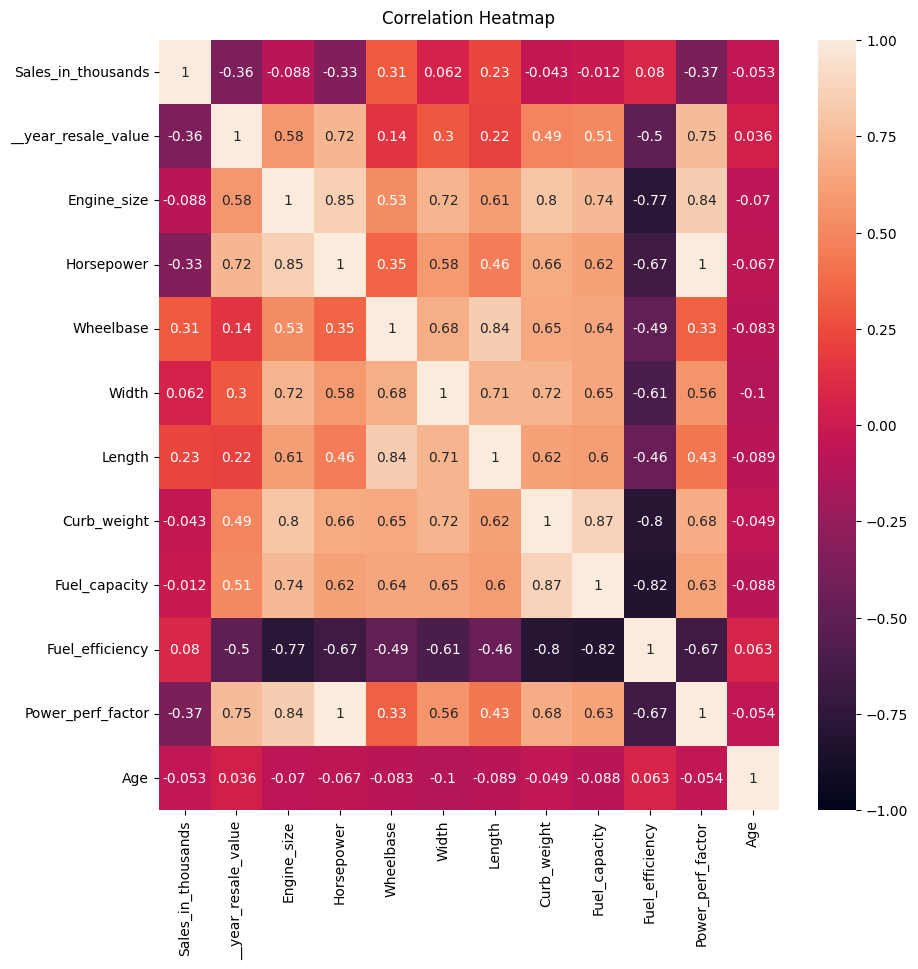

In [87]:
### Plotting the correlation between various columns of the filter_dataset

plt.figure(figsize = (10, 10))
heatmap = sns.heatmap(filter_dataset.corr(), vmin = -1, vmax = 1, annot = True)
heatmap.set_title('Correlation Heatmap', fontdict = {'fontsize' : 12}, pad = 12)

From the above correlation matrix, we can see that there are a few strong correlations between the data. We will use VIF to remove the multi collinearity.

# 4.6.2 Removing the columns that cause multicollinearity using VIF

In [88]:
### Detecting the columns that cause multicollinearity using VIF

column_names = list(filter_dataset.columns)

for name in column_names:
    if len(column_names) >= 2:
        Y = filter_dataset.loc[:, filter_dataset.columns == name]
        X = filter_dataset.loc[:, filter_dataset.columns != name]
        X = sm.add_constant(X)
        linear_model = sm.OLS(Y, X)
        results = linear_model.fit()
        r_squared = results.rsquared
        vif_value = round(1/(1 - r_squared), 2)
        print("Column: {} and VIF: {}".format(name, vif_value))
        
        if vif_value > 10:
            filter_dataset = filter_dataset.drop([name], axis = 1)
            column_names.remove(name)

Column: Sales_in_thousands and VIF: 1.8
Column: __year_resale_value and VIF: 2.99
Column: Engine_size and VIF: 7.56
Column: Horsepower and VIF: 218.59
Column: Width and VIF: 3.06
Column: Length and VIF: 4.35
Column: Curb_weight and VIF: 6.07
Column: Fuel_capacity and VIF: 5.78
Column: Fuel_efficiency and VIF: 4.05
Column: Power_perf_factor and VIF: 6.59
Column: Age and VIF: 1.04


From the above data, we can see that the columns - Engine_size, Horsepower, Curb_weight, Fuel_capacity, Power_perf_factor cause multicollinearity.

# 5. Modelling

Scikit-learn is one of the most popular libraries for machine learning in Python and that is what we will use in the modelling part of this project.

Since Car Price Prediction is a regression problem, we will need to use regression models, also known as regressors, to train on our model to make predictions. I highly recommend checking out the scikit-learn documentation for more information on the different machine learning models available in their library. I have chosen the following regression models for the job:

1. Multi Linear Regression
2. Lasso Regression
3. Ridge Regression
4. Support Vector Regression
5. Decision Tree regression
6. Random Forest Regression
7. Stacking Regression
8. XGBoost Regression

In this section of the notebook, I will fit the models to the training set as outlined above and evaluate their Root Mean Squared Error (RMSE), R-squared at making predictions. Then, we will select the best model based on those values.

# 5.1 Splitting the data to Training and Test sets

Here, we will split the training data into X_train, X_test, Y_train, and Y_test so that they can be fed to the machine learning models that are used in the next section. Then the model with the best performance will be used to predict the result on the given test dataset.

In [89]:
### Splitting the dataset to the matrices X and Y

X = encoded_dataset.iloc[:, : -1].values
Y = encoded_dataset.iloc[:, -1].values

In [90]:
### Looking at the new training data - X

X

array([[0.4157471273915267, 0.6395230335644096, 0.29873983432521284, ...,
        True, False, True],
       [0.5279543113341155, 0.7093780604997578, 0.5786155533818153, ...,
        True, False, True],
       [0.33677244662272454, 0.8298778866013138, 0.6211230447721493, ...,
        True, False, True],
       ...,
       [0.4201450241618965, 0.5775678199753674, 0.44019577167953383, ...,
        True, False, True],
       [0.245244382434228, 0.5775678199753674, 0.4194617645437393, ...,
        True, False, True],
       [0.4299987439771806, 0.5775678199753674, 0.5315882087745145, ...,
        True, False, True]], dtype=object)

In [91]:
### Looking at the new test data - Y

Y

array([21.5  , 28.4  , 42.   , 23.99 , 33.95 , 62.   , 26.99 , 33.4  ,
       38.9  , 21.975, 25.3  , 31.965, 27.885, 39.895, 44.475, 39.665,
       31.01 , 46.225, 13.26 , 16.535, 18.89 , 19.39 , 24.34 , 45.705,
       13.96 ,  9.235, 18.89 , 19.84 , 24.495, 22.245, 16.48 , 28.34 ,
       29.185, 12.64 , 19.045, 20.23 , 22.505, 69.725, 19.46 , 21.315,
       18.575, 16.98 , 26.31 , 19.565, 12.07 , 21.56 , 17.035, 17.885,
       12.315, 22.195, 31.93 , 21.41 , 36.135, 12.05 , 26.935, 12.885,
       15.35 , 20.55 , 26.6  , 26.   ,  9.699, 11.799, 14.999, 29.465,
       42.8  , 14.46 , 21.62 , 26.895, 31.505, 37.805, 46.305, 54.005,
       60.105, 34.605, 39.08 , 43.33 , 42.66 , 13.987, 19.047, 17.357,
       24.997, 25.45 , 31.807, 22.527, 16.24 , 16.54 , 19.035, 22.605,
       27.56 , 22.51 , 31.75 , 49.9  , 69.7  , 82.6  , 38.9  , 41.   ,
       41.6  , 85.5  , 35.3  , 13.499, 20.39 , 26.249, 26.399, 29.299,
       22.799, 17.89 , 18.145, 24.15 , 18.27 , 36.229, 31.598, 25.345,
      

In [92]:
### Data Wrangling 

import numpy as np
import pandas as pd
from collections import Counter
from collections import OrderedDict

### Data Visualization

import matplotlib.pyplot as plt
import seaborn as sns

### Data Preprocessing

import statsmodels.api as sm
from scipy import stats

### Modelling 

from sklearn.model_selection import train_test_split
from math import sqrt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import StackingRegressor
import xgboost as xg

### Tabulating the results

from tabulate import tabulate

### Remove unnecessary warnings

import warnings
warnings.filterwarnings('ignore')

ModuleNotFoundError: No module named 'tabulate'

In [95]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.3/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.5/124.9 MB 796.8 kB/s eta 0:02:37
   ---------------------------------------- 0.5/124.9 MB 796.8 kB/s eta 0:02:37
   ---------------------------------------- 0.8/124.9 MB 958.5 kB/s eta 0:02:10
   ---------------------------------------- 1.0/124.9 MB 931.8 kB/s eta 0:02:13
   ---------------------------------------- 1.3/124.9 MB 919.0 kB/s eta 0:02:15
   ---------------------------------------- 1.3/124.9 MB 919.0 kB/s eta 0:02:15
    --------------------------------------- 1.6/124.9 MB 864.6 kB/s eta 0:02:23
    --------------------------------------- 1.6/124.9 MB 864.6 kB/s eta 0:02:23
    --------------------------------------- 1.6/124.9 MB 864.6 kB/s e

In [96]:
### Dividing the dataset into train and test in the ratio of 80 : 20

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 27, shuffle = True)

Now, we apply regressors using the above data.

# 5.2 Fit the model

In this section, we use various machine learning models to predict the results for our test data (X_test). We will store the model and its corresponding Root Mean Squared Error and Adjusted R-squared so that we can tabulate them later for choosing the best model.

In [97]:
### Dictionary to store model and its rmse

model_rmse = OrderedDict()

In [98]:
### Dictionary to store model and its r-squared

model_r2 = OrderedDict()

# 5.2.1 Applying Multi Linear Regression

In [99]:
### Training the Multi Linear Regression model on the Training set

linear_regressor = LinearRegression()
linear_regressor.fit(X_train, Y_train)

LinearRegression()

In [100]:
### Predicting the Test set results

Y_pred = linear_regressor.predict(X_test)

In [101]:
### Calculating RMSE and Adjusted R-squared for the model

mse = round(mean_squared_error(Y_test, Y_pred), 3)
rmse = round(sqrt(mse), 3)

r2_value = round(r2_score(Y_test, Y_pred), 3)

model_rmse['Multi Linear Regression'] = rmse
model_r2['Multi Linear Regression'] = r2_value

print('Root Mean Squared Error of the model is : {}'.format(rmse))
print('R-squared value of the model is : {}'.format(r2_value))

Root Mean Squared Error of the model is : 4.213
R-squared value of the model is : 0.927


# 5.2.2 Applying Lasso Regression

In [102]:
### Training the Lasso Regression model on the Training set

lasso = Lasso()
parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-3, 1e-2, 1, 5, 10, 20, 30, 35, 40, 45, 50, 55, 100]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring = 'neg_mean_squared_error', cv = 5)
lasso_regressor.fit(X_train, Y_train)

C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.590e+02, tolerance: 1.997e+00
  model = cd_fast.enet_coordinate_descent(
C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.558e+02, tolerance: 1.945e+00
  model = cd_fast.enet_coordinate_descent(
C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing 

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             scoring='neg_mean_squared_error')

In [103]:
### Finding out negative mean squared error in Lasso Regression

print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 1e-15}
-23.483013776792184


In [104]:
### Predicting the Test set results

Y_pred = lasso_regressor.predict(X_test)

In [105]:
### Calculating RMSE and Adjusted R-squared for the model

mse = round(mean_squared_error(Y_test, Y_pred), 3)
rmse = round(sqrt(mse), 3)

r2_value = round(r2_score(Y_test, Y_pred), 3)

model_rmse['Lasso Regression'] = rmse
model_r2['Lasso Regression'] = r2_value

print('Root Mean Squared Error of the model is : {}'.format(rmse))
print('R-squared value of the model is : {}'.format(r2_value))

Root Mean Squared Error of the model is : 4.299
R-squared value of the model is : 0.924


# 5.2.3 Applying Ridge Regression

In [106]:
### Training the Ridge Regression model on the Training set

ridge = Ridge()
parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-3, 1e-2, 1, 5, 10, 20, 30, 35, 40, 45, 50, 55, 100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring = 'neg_mean_squared_error', cv = 5)
ridge_regressor.fit(X_train, Y_train)

C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.53361e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             scoring='neg_mean_squared_error')

In [107]:
### Finding out negative mean squared error in Lasso Regression

print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 1e-08}
-23.542197350643328


In [108]:
### Predicting the Test set results

Y_pred = ridge_regressor.predict(X_test)

In [109]:
### Calculating RMSE and Adjusted R-squared for the model

mse = round(mean_squared_error(Y_test, Y_pred), 3)
rmse = round(sqrt(mse), 3)

r2_value = round(r2_score(Y_test, Y_pred), 3)

model_rmse['Ridge Regression'] = rmse
model_r2['Ridge Regression'] = r2_value

print('Root Mean Squared Error of the model is : {}'.format(rmse))
print('R-squared value of the model is : {}'.format(r2_value))

Root Mean Squared Error of the model is : 4.213
R-squared value of the model is : 0.927


# 5.2.4 Applying Support Vector Regression

In [110]:
### Training the Support Vector Regression model on the Training set

support_vector_regressor = SVR(kernel = 'rbf')
support_vector_regressor.fit(X_train, Y_train)

SVR()

In [111]:
### Predicting the Test set results

Y_pred = support_vector_regressor.predict(X_test)

In [112]:
### Calculating RMSE and Adjusted R-squared for the model

mse = round(mean_squared_error(Y_test, Y_pred), 3)
rmse = round(sqrt(mse), 3)

r2_value = round(r2_score(Y_test, Y_pred), 3)

model_rmse['Support Vector Regression'] = rmse
model_r2['Support Vector Regression'] = r2_value

print('Root Mean Squared Error of the model is : {}'.format(rmse))
print('R-squared value of the model is : {}'.format(r2_value))

Root Mean Squared Error of the model is : 12.106
R-squared value of the model is : 0.395


# 5.2.5 Applying Decision Tree Regression

In [113]:
### Training the Decision Tree Regression model on the Training set

decision_tree_regressor = DecisionTreeRegressor()
decision_tree_regressor.fit(X_train, Y_train)

DecisionTreeRegressor()

In [114]:
### Predicting the Test set results

Y_pred = decision_tree_regressor.predict(X_test)

In [115]:
### Calculating RMSE and Adjusted R-squared for the model

mse = round(mean_squared_error(Y_test, Y_pred), 3)
rmse = round(sqrt(mse), 3)

r2_value = round(r2_score(Y_test, Y_pred), 3)

model_rmse['Decision Tree Regression'] = rmse
model_r2['Decision Tree Regression'] = r2_value

print('Root Mean Squared Error of the model is : {}'.format(rmse))
print('R-squared value of the model is : {}'.format(r2_value))

Root Mean Squared Error of the model is : 6.587
R-squared value of the model is : 0.821


# 5.2.6 Applying Random Forest Regression (10 trees)

In [116]:
### Training the Random Forest Regression model on the Training set

random_forest_regressor = RandomForestRegressor(n_estimators = 10, random_state = 27)
random_forest_regressor.fit(X_train, Y_train)

RandomForestRegressor(n_estimators=10, random_state=27)

In [117]:
### Predicting the Test set results

Y_pred = random_forest_regressor.predict(X_test)

In [118]:
### Calculating RMSE and Adjusted R-squared for the model

mse = round(mean_squared_error(Y_test, Y_pred), 3)
rmse = round(sqrt(mse), 3)

r2_value = round(r2_score(Y_test, Y_pred), 3)

model_rmse['Random Forest Regression (10 trees)'] = rmse
model_r2['Random Forest Regression (10 trees)'] = r2_value

print('Root Mean Squared Error of the model is : {}'.format(rmse))
print('R-squared value of the model is : {}'.format(r2_value))

Root Mean Squared Error of the model is : 5.959
R-squared value of the model is : 0.853


# 5.2.7 Applying Random Forest Regression (25 trees)

In [119]:
### Training the Random Forest Regression model on the Training set

random_forest_regressor = RandomForestRegressor(n_estimators = 25, random_state = 27)
random_forest_regressor.fit(X_train, Y_train)

RandomForestRegressor(n_estimators=25, random_state=27)

In [120]:
### Predicting the Test set results

Y_pred = random_forest_regressor.predict(X_test)

In [121]:
### Calculating RMSE and Adjusted R-squared for the model

mse = round(mean_squared_error(Y_test, Y_pred), 3)
rmse = round(sqrt(mse), 3)

r2_value = round(r2_score(Y_test, Y_pred), 3)

model_rmse['Random Forest Regression (25 trees)'] = rmse
model_r2['Random Forest Regression (25 trees)'] = r2_value

print('Root Mean Squared Error of the model is : {}'.format(rmse))
print('R-squared value of the model is : {}'.format(r2_value))

Root Mean Squared Error of the model is : 6.044
R-squared value of the model is : 0.849


# 5.2.8 Applying Random Forest Regression (50 trees)

In [122]:
### Training the Random Forest Regression model on the Training set

random_forest_regressor = RandomForestRegressor(n_estimators = 50, random_state = 27)
random_forest_regressor.fit(X_train, Y_train)

RandomForestRegressor(n_estimators=50, random_state=27)

In [123]:
### Predicting the Test set results

Y_pred = random_forest_regressor.predict(X_test)

In [124]:
### Calculating RMSE and Adjusted R-squared for the model

mse = round(mean_squared_error(Y_test, Y_pred), 3)
rmse = round(sqrt(mse), 3)

r2_value = round(r2_score(Y_test, Y_pred), 3)

model_rmse['Random Forest Regression (50 trees)'] = rmse
model_r2['Random Forest Regression (50 trees)'] = r2_value

print('Root Mean Squared Error of the model is : {}'.format(rmse))
print('R-squared value of the model is : {}'.format(r2_value))

Root Mean Squared Error of the model is : 6.111
R-squared value of the model is : 0.846


# 5.2.9 Applying Random Forest Regression (100 trees)

In [125]:
### Training the Random Forest Regression model on the Training set

random_forest_regressor = RandomForestRegressor(n_estimators = 100, random_state = 27)
random_forest_regressor.fit(X_train, Y_train)

RandomForestRegressor(random_state=27)

In [126]:
### Predicting the Test set results

Y_pred = random_forest_regressor.predict(X_test)

In [127]:
### Calculating RMSE and Adjusted R-squared for the model

mse = round(mean_squared_error(Y_test, Y_pred), 3)
rmse = round(sqrt(mse), 3)

r2_value = round(r2_score(Y_test, Y_pred), 3)

model_rmse['Random Forest Regression (100 trees)'] = rmse
model_r2['Random Forest Regression (100 trees)'] = r2_value

print('Root Mean Squared Error of the model is : {}'.format(rmse))
print('R-squared value of the model is : {}'.format(r2_value))

Root Mean Squared Error of the model is : 5.854
R-squared value of the model is : 0.858


# 5.2.10 Applying Random Forest Regression (1000 trees)

In [128]:
### Training the Random Forest Regression model on the Training set

random_forest_regressor = RandomForestRegressor(n_estimators = 1000, random_state = 27)
random_forest_regressor.fit(X_train, Y_train)

RandomForestRegressor(n_estimators=1000, random_state=27)

In [129]:
### Predicting the Test set results

Y_pred = random_forest_regressor.predict(X_test)

In [130]:
### Calculating RMSE and Adjusted R-squared for the model

mse = round(mean_squared_error(Y_test, Y_pred), 3)
rmse = round(sqrt(mse), 3)

r2_value = round(r2_score(Y_test, Y_pred), 3)

model_rmse['Random Forest Regression (1000 trees)'] = rmse
model_r2['Random Forest Regression (1000 trees)'] = r2_value

print('Root Mean Squared Error of the model is : {}'.format(rmse))
print('R-squared value of the model is : {}'.format(r2_value))

Root Mean Squared Error of the model is : 5.99
R-squared value of the model is : 0.852


# 5.2.11 Applying Stacking Regression

In [131]:
### Preparing the Stacking Regressor

### Define the base models

base_models = list()

base_models.append(('decision_tree', decision_tree_regressor))
base_models.append(('support_vector', support_vector_regressor))

### Define the meta models

meta_model = random_forest_regressor

In [132]:
### Training the Stacking Regression model on the Training set

stacking_regressor = StackingRegressor(estimators = base_models, final_estimator = meta_model)
stacking_regressor.fit(X_train, Y_train)

StackingRegressor(estimators=[('decision_tree', DecisionTreeRegressor()),
                              ('support_vector', SVR())],
                  final_estimator=RandomForestRegressor(n_estimators=1000,
                                                        random_state=27))

In [133]:
### Predicting the Test set results

Y_pred = stacking_regressor.predict(X_test)

In [134]:
### Calculating RMSE and Adjusted R-squared for the model

mse = round(mean_squared_error(Y_test, Y_pred), 3)
rmse = round(sqrt(mse), 3)

r2_value = round(r2_score(Y_test, Y_pred), 3)

model_rmse['Stacking Regression'] = rmse
model_r2['Stacking Regression'] = r2_value

print('Root Mean Squared Error of the model is : {}'.format(rmse))
print('R-squared value of the model is : {}'.format(r2_value))

Root Mean Squared Error of the model is : 6.509
R-squared value of the model is : 0.825


# 5.2.12 Applying XGBoost Regression

In [136]:
### Training the XGBoost Regression model on the Training set
import xgboost as xg
xgboost_regressor = xg.XGBRegressor(objective ='reg:linear', n_estimators = 100, seed = 27)
xgboost_regressor.fit(X_train, Y_train)

C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [19:07:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, objective='reg:linear', ...)

In [137]:
### Predicting the Test set results

Y_pred = xgboost_regressor.predict(X_test)

In [138]:
### Calculating RMSE and Adjusted R-squared for the model

mse = round(mean_squared_error(Y_test, Y_pred), 3)
rmse = round(sqrt(mse), 3)

r2_value = round(r2_score(Y_test, Y_pred), 3)

model_rmse['XGBoost Regression'] = rmse
model_r2['XGBoost Regression'] = r2_value

print('Root Mean Squared Error of the model is : {}'.format(rmse))
print('R-squared value of the model is : {}'.format(r2_value))

Root Mean Squared Error of the model is : 6.094
R-squared value of the model is : 0.847


# 5.3 Model evalution

Model evaluation is the process of using different evaluation metrics to understand a machine learning model's performance, as well as its strengths and weaknesses.

# 5.3.1 RMSE, R-squared of the models

Now we will tabulate all the models along with their RMSE, R-Squared. This data is stored in the model_rmse, model_r2 dictionary. We will use the tabulate package for tabulating the results.

In [139]:
### Looking at the model rmse dictionary

model_rmse

OrderedDict([('Multi Linear Regression', 4.213),
             ('Lasso Regression', 4.299),
             ('Ridge Regression', 4.213),
             ('Support Vector Regression', 12.106),
             ('Decision Tree Regression', 6.587),
             ('Random Forest Regression (10 trees)', 5.959),
             ('Random Forest Regression (25 trees)', 6.044),
             ('Random Forest Regression (50 trees)', 6.111),
             ('Random Forest Regression (100 trees)', 5.854),
             ('Random Forest Regression (1000 trees)', 5.99),
             ('Stacking Regression', 6.509),
             ('XGBoost Regression', 6.094)])

In [140]:
### Looking at the model r-squared dictionary

model_r2

OrderedDict([('Multi Linear Regression', 0.927),
             ('Lasso Regression', 0.924),
             ('Ridge Regression', 0.927),
             ('Support Vector Regression', 0.395),
             ('Decision Tree Regression', 0.821),
             ('Random Forest Regression (10 trees)', 0.853),
             ('Random Forest Regression (25 trees)', 0.849),
             ('Random Forest Regression (50 trees)', 0.846),
             ('Random Forest Regression (100 trees)', 0.858),
             ('Random Forest Regression (1000 trees)', 0.852),
             ('Stacking Regression', 0.825),
             ('XGBoost Regression', 0.847)])

In [141]:
### Tabulating the results

table = []
table.append(['S.No.', 'Classification Model', 'Root Mean Squared Error', 'R-squared'])
count = 1

for model in model_rmse:
    row = [count, model, model_rmse[model], model_r2[model]]
    table.append(row)
    count += 1
    
print(tabulate(table, headers = 'firstrow', tablefmt = 'fancy_grid'))

NameError: name 'tabulate' is not defined

From the above table, we can see that the model Linear Regression has the least Root Mean Squared Error of 4.245 and the highest R-squared value of 0.926.

# 6. Conclusion

Hence, for this problem, we will use Linear regressor to predict the Sales Price of the Car.